In [1]:
#national biodiversity project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from plotnine import *

In [2]:
obs = pd.read_csv("C:/Users/ajmar/OneDrive/Documents/coding/datasets/biodiversity/observations.csv")
species_info = pd.read_csv("C:/Users/ajmar/OneDrive/Documents/coding/datasets/biodiversity/species_info.csv")
#%%
#pd.set_option('display.max_columns', 25)
#print(obs.head())
#print(species_info.head())
#%%

biodiv = pd.merge(obs, species_info)
display(biodiv.head())


,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


In [3]:
print(biodiv.dtypes)

scientific_name        object
park_name              object
observations            int64
category               object
common_names           object
conservation_status    object
dtype: object


In [4]:
biodiv['scientific_name'] = biodiv['scientific_name'].str.lower()
biodiv['park_name'] = biodiv['park_name'].str.lower()
biodiv['common_names'] = biodiv['common_names'].str.lower()
biodiv['conservation_status'] = biodiv['conservation_status'].str.lower()
biodiv['category'] = biodiv['category'].str.lower()

In [5]:
display(biodiv)

,scientific_name,park_name,observations,category,common_names,conservation_status
0,vicia benghalensis,great smoky mountains national park,68,vascular plant,"purple vetch, reddish tufted vetch",NaN
1,vicia benghalensis,yosemite national park,148,vascular plant,"purple vetch, reddish tufted vetch",NaN
2,vicia benghalensis,yellowstone national park,247,vascular plant,"purple vetch, reddish tufted vetch",NaN
3,vicia benghalensis,bryce national park,104,vascular plant,"purple vetch, reddish tufted vetch",NaN
4,neovison vison,great smoky mountains national park,77,mammal,american mink,NaN
...,...,...,...,...,...,...
25627,gulo gulo,yosemite national park,157,mammal,wolverine,NaN
25628,dichanthelium depauperatum,great smoky mountains national park,88,vascular plant,"green panic-grass, panic grass",NaN
25629,dichanthelium depauperatum,bryce national park,80,vascular plant,"green panic-grass, panic grass",NaN
25630,dichanthelium depauperatum,yellowstone national park,255,vascular plant,"green panic-grass, panic grass",NaN


In [6]:
biodiv2 = biodiv
biodiv2['conservation_status2'] = biodiv2['conservation_status'].map({"endangered":5, "threatened":4, 'species of concern':3, 'in recovery':2})
biodiv2['conservation_status2'] = biodiv2['conservation_status2'].fillna(1)
display(biodiv2.head())

,scientific_name,park_name,observations,category,common_names,conservation_status,conservation_status2
0,vicia benghalensis,great smoky mountains national park,68,vascular plant,"purple vetch, reddish tufted vetch",NaN,1.0
1,vicia benghalensis,yosemite national park,148,vascular plant,"purple vetch, reddish tufted vetch",NaN,1.0
2,vicia benghalensis,yellowstone national park,247,vascular plant,"purple vetch, reddish tufted vetch",NaN,1.0
3,vicia benghalensis,bryce national park,104,vascular plant,"purple vetch, reddish tufted vetch",NaN,1.0
4,neovison vison,great smoky mountains national park,77,mammal,american mink,NaN,1.0


In [7]:
biodiv2['conservation_status2'] = biodiv2['conservation_status2'].astype('category')
biodiv2['conservation_status2'] = pd.Categorical(biodiv2['conservation_status2'], ordered=True)
display(biodiv2['conservation_status2'].unique())

[1.0, 3.0, 4.0, 5.0, 2.0]
Categories (5, float64): [1.0 < 2.0 < 3.0 < 4.0 < 5.0]

In [8]:
print(biodiv2.category.unique())

['vascular plant' 'mammal' 'bird' 'nonvascular plant' 'amphibian'
 'reptile' 'fish']


In [9]:
biodiv2['category'] = biodiv2['category'].astype('category')
biodiv2['cat2'] = biodiv2['category'].cat.codes
bcat2 = biodiv2.groupby('category').cat2.mean()
print(bcat2)

category
amphibian            0
bird                 1
fish                 2
mammal               3
nonvascular plant    4
reptile              5
vascular plant       6
Name: cat2, dtype: int8


In [10]:
total_obs = biodiv2.groupby('park_name').observations.sum()
print(total_obs)

park_name
bryce national park                     633291
great smoky mountains national park     474863
yellowstone national park              1587641
yosemite national park                  949452
Name: observations, dtype: int64


In [11]:
biodiv3 = pd.merge(biodiv2, total_obs, left_on='park_name', right_on ='park_name', how='outer')
biodiv3 = biodiv3.rename(columns = {'observations_x':'observations', "observations_y":"park_obs"})
biodiv3['per_obs'] = biodiv3['observations']/biodiv3['park_obs']
display(biodiv3)


,scientific_name,park_name,observations,category,common_names,conservation_status,conservation_status2,cat2,park_obs,per_obs
0,vicia benghalensis,great smoky mountains national park,68,vascular plant,"purple vetch, reddish tufted vetch",NaN,1.0,6,474863,0.000143
1,neovison vison,great smoky mountains national park,77,mammal,american mink,NaN,1.0,3,474863,0.000162
2,prunus subcordata,great smoky mountains national park,72,vascular plant,klamath plum,NaN,1.0,6,474863,0.000152
3,abutilon theophrasti,great smoky mountains national park,85,vascular plant,velvetleaf,NaN,1.0,6,474863,0.000179
4,githopsis specularioides,great smoky mountains national park,85,vascular plant,common bluecup,NaN,1.0,6,474863,0.000179
...,...,...,...,...,...,...,...,...,...,...
25627,listera borealis,bryce national park,80,vascular plant,"northern listera, northern twayblade",NaN,1.0,6,633291,0.000126
25628,trifolium gracilentum var. gracilentum,bryce national park,50,vascular plant,pinpoint clover,NaN,1.0,6,633291,0.000079
25629,ranunculus hebecarpus,bryce national park,108,vascular plant,"delicate buttercup, downy-fruit buttercup",NaN,1.0,6,633291,0.000171
25630,gulo gulo,bryce national park,114,mammal,wolverine,NaN,1.0,3,633291,0.000180


In [12]:
by_park = biodiv3.groupby(['park_name', 'category'], as_index=False).observations.sum()
display(by_park)

,park_name,category,observations
0,bryce national park,amphibian,7542
1,bryce national park,bird,58590
2,bryce national park,fish,12823
3,bryce national park,mammal,28830
4,bryce national park,nonvascular plant,32992
5,bryce national park,reptile,8141
6,bryce national park,vascular plant,484373
7,great smoky mountains national park,amphibian,5876
8,great smoky mountains national park,bird,42869
9,great smoky mountains national park,fish,9482


In [13]:
by_park2 = biodiv3.groupby(['park_name', 'category']).per_obs.sum().unstack() 
display(by_park2)

category,amphibian,bird,fish,mammal,nonvascular plant,reptile,vascular plant
park_name,,,,,,,
bryce national park,0.011909,0.092517,0.020248,0.045524,0.052096,0.012855,0.764851
great smoky mountains national park,0.012374,0.090277,0.019968,0.044341,0.052346,0.012300,0.768394
yellowstone national park,0.012558,0.090890,0.019815,0.044532,0.052292,0.012636,0.767278
yosemite national park,0.012337,0.091223,0.020156,0.044797,0.052433,0.012406,0.766647


In [14]:
by_park_end = biodiv3.groupby(['park_name', 'conservation_status2']).observations.sum().unstack()
display(by_park_end)

conservation_status2,1.0,2.0,3.0,4.0,5.0
park_name,,,,,
bryce national park,614682,388,17011,591,619
great smoky mountains national park,462047,248,11735,440,393
yellowstone national park,1543058,889,40677,1459,1558
yosemite national park,922539,582,24539,849,943


In [15]:
vascP = biodiv3[biodiv3['cat2']==6]
#print(vascP)


category_codes = ["amphibian", "bird", "fish", "mammal", "nonvascular plant", "reptile", "vascular plant"]
dict2 = {}                
for i in range(0,7):
                  variable_name = "2_"+str(category_codes[i])
                  variable_data = biodiv3[biodiv3['cat2']==i]       
                  dict2[variable_name] = variable_data

In [16]:
all_amphibs = pd.DataFrame(dict2['2_amphibian']).reset_index(drop=True)
all_birds = pd.DataFrame(dict2['2_bird']).reset_index(drop=True)
all_fish = pd.DataFrame(dict2['2_fish']).reset_index(drop=True)
all_mammals = pd.DataFrame(dict2['2_mammal']).reset_index(drop=True)
all_nonvPlants = pd.DataFrame(dict2['2_nonvascular plant']).reset_index(drop=True)
all_reptiles = pd.DataFrame(dict2['2_reptile']).reset_index(drop=True)
all_vascPlants = pd.DataFrame(dict2['2_vascular plant']).reset_index(drop=True)

In [17]:
# sns.pairplot(biodiv3, hue='park_name')
# plt.show()

Looking at total proportions across all sites

In [18]:
# graph1 = sns.barplot(data=biodiv3, x="park_name", y="per_obs", hue="category")
# graph1.set_xlabel('Park')
# graph1.set_ylabel('Observations')
# plt.xticks(rotation=40, ha='right')
# plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

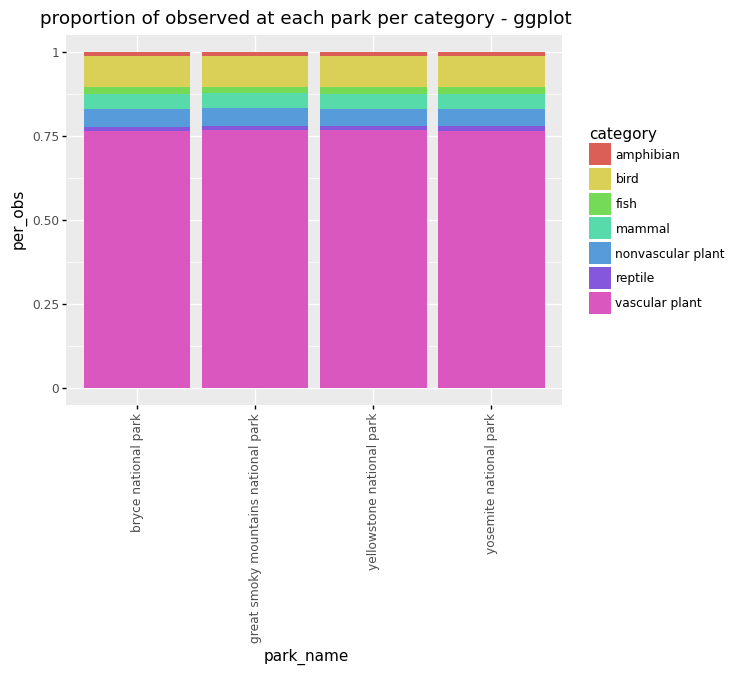

<ggplot: (147375013825)>

In [19]:
graph_nineplot = ggplot(biodiv3, aes(x='park_name', y='per_obs', fill='category')) + geom_bar(stat='identity', position='stack') + ggtitle('proportion of observed at each park per category - ggplot') + theme(axis_text_x=element_text(rotation=90))
graph_nineplot

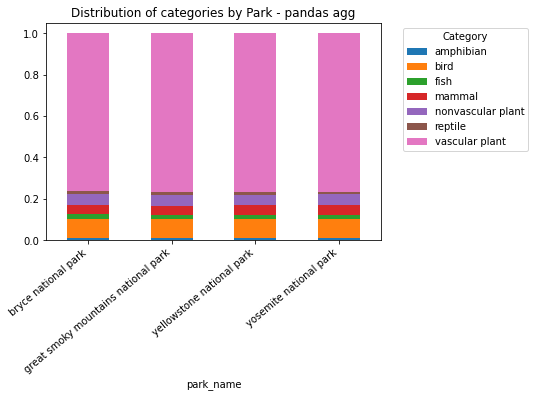

In [20]:
by_park2.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Distribution of categories by Park - pandas agg')
plt.xticks(rotation=40, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Look at total observations from each park broken down by group

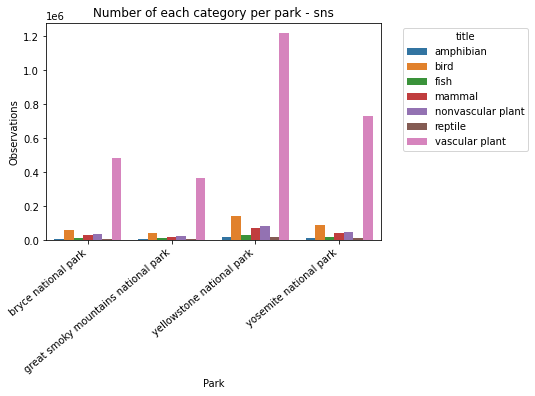

In [21]:
graph1 = sns.barplot(data=by_park, x="park_name", y="observations", hue="category")
graph1.set_xlabel('Park')
graph1.set_ylabel('Observations')
plt.title('Number of each category per park - sns')
plt.xticks(rotation=40, ha='right')
plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [22]:
# sns.scatterplot(data=all_reptiles, x="conservation_status2", y='per_obs', hue='park_name', alpha=0.4)
# plt.legend(title="park name", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation=40, ha='right')
# plt.show()

Look at proportionate distributions across all sites in regards to category and risk

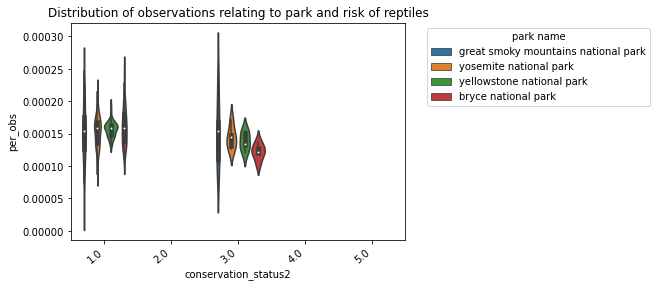

In [23]:
sns.violinplot(data=all_reptiles, x="conservation_status2", y='per_obs', hue='park_name')
plt.legend(title="park name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=40, ha='right')
plt.title('Distribution of observations relating to park and risk of reptiles')
plt.show()

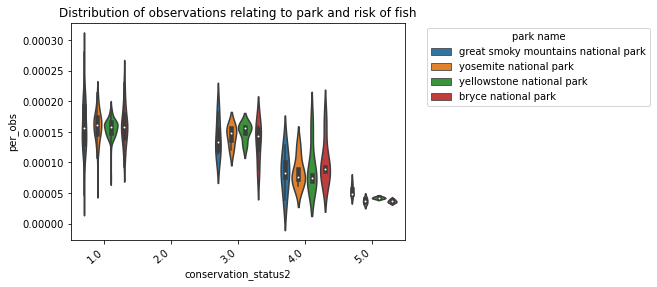

In [24]:
sns.violinplot(data=all_fish, x="conservation_status2", y='per_obs', hue='park_name')
plt.legend(title="park name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=40, ha='right')
plt.title('Distribution of observations relating to park and risk of fish')
plt.show()

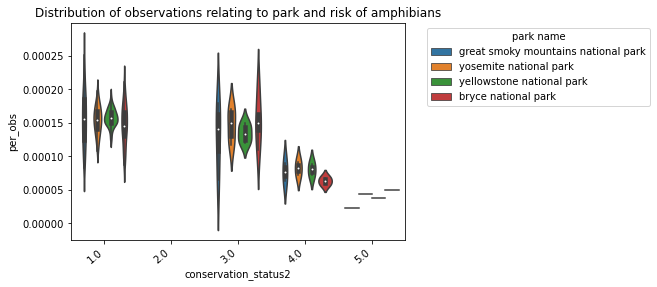

In [25]:
sns.violinplot(data=all_amphibs, x="conservation_status2", y='per_obs', hue='park_name')
plt.legend(title="park name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=40, ha='right')
plt.title('Distribution of observations relating to park and risk of amphibians')
plt.show()

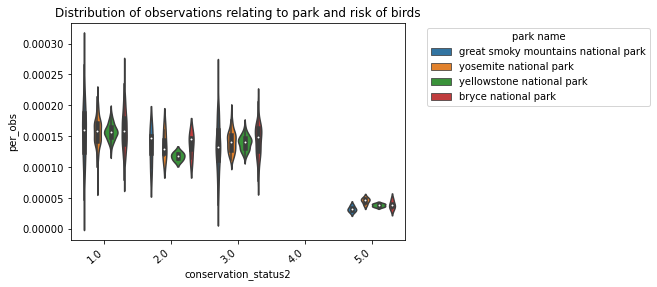

In [26]:
sns.violinplot(data=all_birds, x="conservation_status2", y='per_obs', hue='park_name')
plt.legend(title="park name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=40, ha='right')
plt.title('Distribution of observations relating to park and risk of birds')
plt.show()

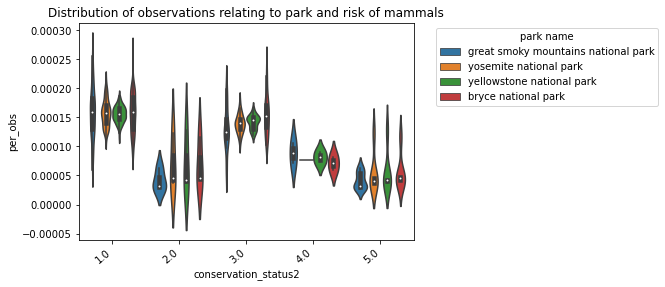

In [27]:
sns.violinplot(data=all_mammals, x="conservation_status2", y='per_obs', hue='park_name')
plt.legend(title="park name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=40, ha='right')
plt.title('Distribution of observations relating to park and risk of mammals')
plt.show()

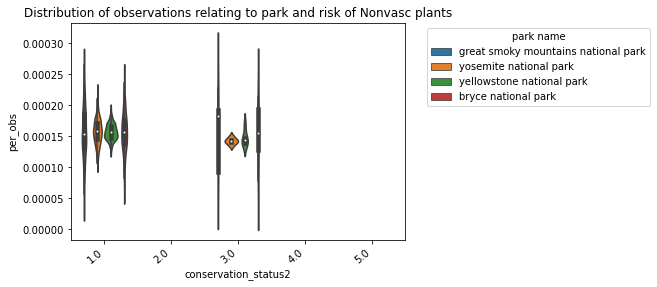

In [28]:
sns.violinplot(data=all_nonvPlants, x="conservation_status2", y='per_obs', hue='park_name')
plt.legend(title="park name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=40, ha='right')
plt.title('Distribution of observations relating to park and risk of Nonvasc plants')
plt.show()

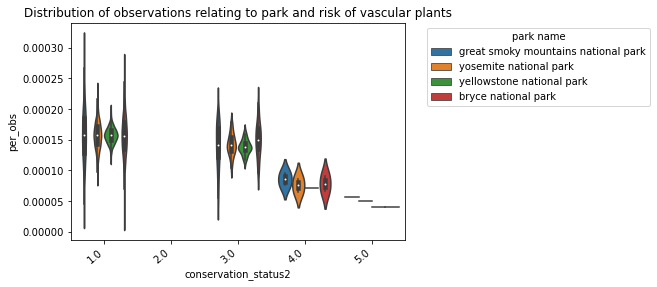

In [29]:
sns.violinplot(data=all_vascPlants, x="conservation_status2", y='per_obs', hue='park_name')
plt.legend(title="park name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=40, ha='right')
plt.title('Distribution of observations relating to park and risk of vascular plants')
plt.show()

Distributions of raw observations across all sites in regards to conservation status

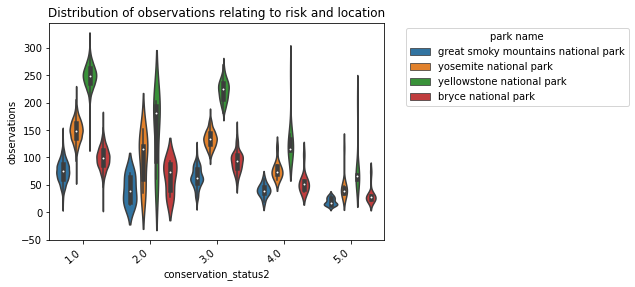

In [30]:
sns.violinplot(data=biodiv3, x="conservation_status2", y='observations', hue='park_name')
plt.legend(title="park name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=40, ha='right')
plt.title('Distribution of observations relating to risk and location')
plt.show()

Distributions of proportional observations across all sites in regards to conservation status

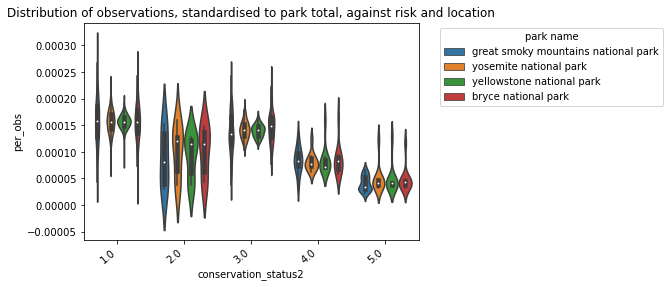

In [31]:
sns.violinplot(data=biodiv3, x="conservation_status2", y='per_obs', hue='park_name')
plt.legend(title="park name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=40, ha='right')
plt.title('Distribution of observations, standardised to park total, against risk and location')
plt.show()

In [44]:
cso = biodiv3.groupby(['park_name', 'conservation_status']).observations.sum().unstack()
display(cso)

conservation_status,endangered,in recovery,species of concern,threatened
park_name,,,,
bryce national park,619,388,17011,591
great smoky mountains national park,393,248,11735,440
yellowstone national park,1558,889,40677,1459
yosemite national park,943,582,24539,849


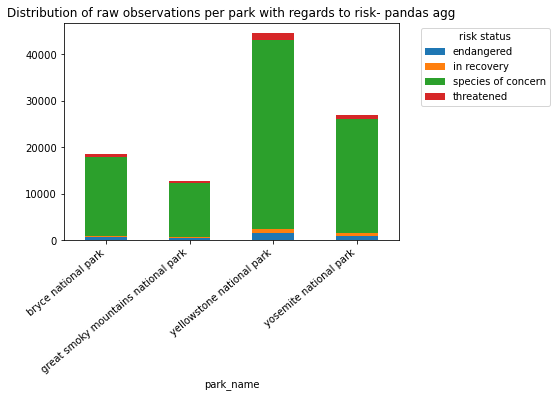

In [52]:
cso.plot(kind='bar', stacked=True)
plt.title('Distribution of raw observations per park with regards to risk- pandas agg')
plt.xticks(rotation=40, ha='right')
plt.legend(title='risk status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [46]:
cso2 = biodiv3.groupby(['park_name', 'conservation_status']).per_obs.sum().unstack()
display(cso)

conservation_status,endangered,in recovery,species of concern,threatened
park_name,,,,
bryce national park,619,388,17011,591
great smoky mountains national park,393,248,11735,440
yellowstone national park,1558,889,40677,1459
yosemite national park,943,582,24539,849


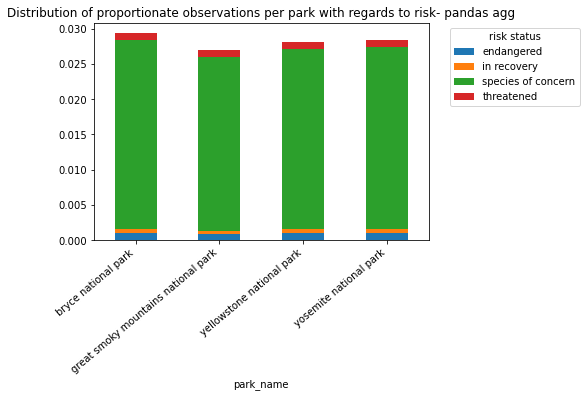

In [54]:
cso2.plot(kind='bar', stacked=True)
plt.title('Distribution of proportionate observations per park with regards to risk- pandas agg')
plt.xticks(rotation=40, ha='right')
plt.legend(title='risk status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

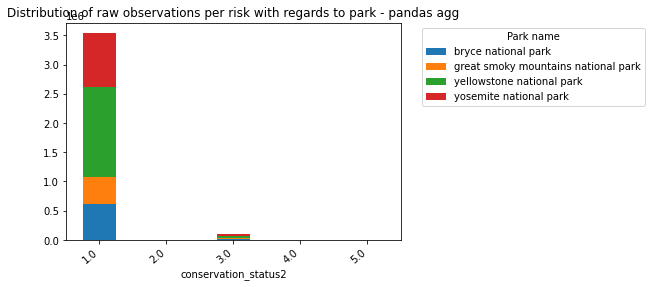

In [56]:
cso3 = biodiv3.groupby(['conservation_status2', 'park_name']).observations.sum().unstack()
cso3.plot(kind='bar', stacked=True)
plt.title('Distribution of raw observations per risk with regards to park - pandas agg')
plt.xticks(rotation=40, ha='right')
plt.legend(title='Park name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

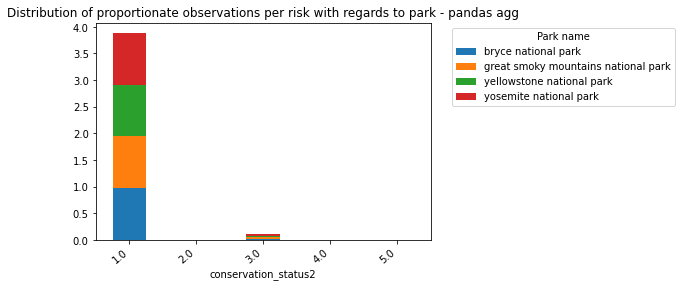

In [59]:
cso3 = biodiv3.groupby(['conservation_status2', 'park_name']).per_obs.sum().unstack()
cso3.plot(kind='bar', stacked=True)
plt.title('Distribution of proportionate observations per risk with regards to park - pandas agg')
plt.xticks(rotation=40, ha='right')
plt.legend(title='Park name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

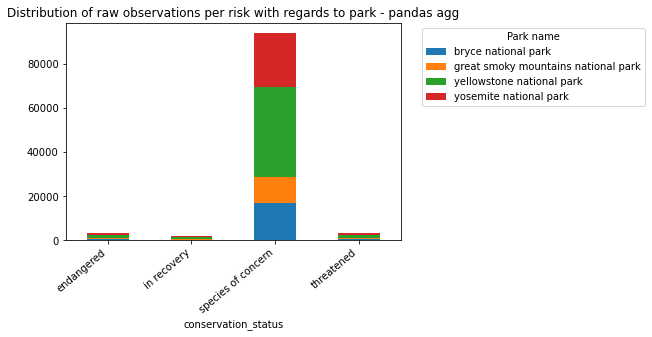

In [62]:
cso3 = biodiv3.groupby(['conservation_status', 'park_name']).observations.sum().unstack()
cso3.plot(kind='bar', stacked=True)
plt.title('Distribution of raw observations per risk with regards to park - pandas agg')
plt.xticks(rotation=40, ha='right')
plt.legend(title='Park name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

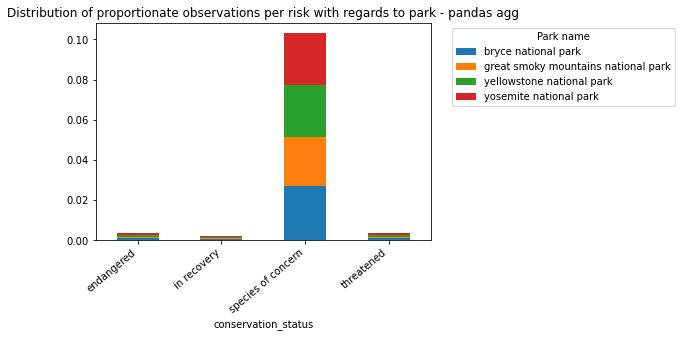

In [61]:
cso3 = biodiv3.groupby(['conservation_status', 'park_name']).per_obs.sum().unstack()
cso3.plot(kind='bar', stacked=True)
plt.title('Distribution of proportionate observations per risk with regards to park - pandas agg')
plt.xticks(rotation=40, ha='right')
plt.legend(title='Park name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [113]:
biodiv4 = biodiv3[biodiv3['conservation_status2']>1].sort_values(['scientific_name'], ascending=(True))
biodiv5 = biodiv4.groupby('scientific_name').per_obs.mean()
display(biodiv5)

scientific_name
abies fraseri             0.000149
abronia ammophila         0.000145
accipiter cooperii        0.000147
accipiter striatus        0.000123
achnatherum contractum    0.000149
                            ...   
vaccinium hirsutum        0.000133
vermivora bachmanii       0.000038
vermivora ruficapilla     0.000122
wilsonia pusilla          0.000142
zizia trifoliata          0.000149
Name: per_obs, Length: 179, dtype: float64

In [115]:
biodiv5 = pd.DataFrame(biodiv5)
biodiv6 = pd.merge(biodiv4, biodiv5, how='outer', left_on='scientific_name', right_on='scientific_name', suffixes=['', '_species_mean'])
biodiv6['difference_in_obs'] = biodiv6['per_obs'] - biodiv6['per_obs_species_mean']
display(biodiv6.head())

,scientific_name,park_name,observations,category,common_names,conservation_status,conservation_status2,cat2,park_obs,per_obs,per_obs_species_mean,difference_in_obs
0,abies fraseri,yosemite national park,110,vascular plant,fraser fir,species of concern,3.0,6,949452,0.000116,0.000149,-0.000033
1,abies fraseri,yellowstone national park,218,vascular plant,fraser fir,species of concern,3.0,6,1587641,0.000137,0.000149,-0.000012
2,abies fraseri,bryce national park,109,vascular plant,fraser fir,species of concern,3.0,6,633291,0.000172,0.000149,0.000023
3,abies fraseri,great smoky mountains national park,81,vascular plant,fraser fir,species of concern,3.0,6,474863,0.000171,0.000149,0.000022
4,abronia ammophila,great smoky mountains national park,72,vascular plant,"wyoming sand verbena, yellowstone sand verbena",species of concern,3.0,6,474863,0.000152,0.000145,0.000006


In [120]:
risk_by_park2 = biodiv6[biodiv6['conservation_status2']==2].groupby("park_name").difference_in_obs.sum()
risk_by_park3 = biodiv6[biodiv6['conservation_status2']==3].groupby("park_name").difference_in_obs.sum()
risk_by_park4 = biodiv6[biodiv6['conservation_status2']==4].groupby("park_name").difference_in_obs.sum()
risk_by_park5 = biodiv6[biodiv6['conservation_status2']==5].groupby("park_name").difference_in_obs.sum()


In [123]:
#"endangered":5, "threatened":4, 'species of concern':3, 'in recovery':2}
print('risk group - in recovery')
display(risk_by_park2)
print()
print('risk group - of concern')
display(risk_by_park3)
print()
print('risk group - threatened')
display(risk_by_park4)
print()
print('endangered')
display(risk_by_park5)


risk group - in recovery


park_name
bryce national park                    0.000036
great smoky mountains national park   -0.000055
yellowstone national park             -0.000017
yosemite national park                 0.000036
Name: difference_in_obs, dtype: float64


risk group - of concern


park_name
bryce national park                    0.001101
great smoky mountains national park   -0.001048
yellowstone national park             -0.000139
yosemite national park                 0.000085
Name: difference_in_obs, dtype: float64


risk group - threatened


park_name
bryce national park                    1.497607e-05
great smoky mountains national park    8.338829e-06
yellowstone national park              7.292891e-07
yosemite national park                -2.404418e-05
Name: difference_in_obs, dtype: float64


endangered


park_name
bryce national park                    0.000033
great smoky mountains national park   -0.000117
yellowstone national park              0.000036
yosemite national park                 0.000048
Name: difference_in_obs, dtype: float64

In [123]:
#"endangered":5, "threatened":4, 'species of concern':3, 'in recovery':2}
print('risk group - in recovery')
display(risk_by_park2)
print()
print('risk group - of concern')
display(risk_by_park3)
print()
print('risk group - threatened')
display(risk_by_park4)
print()
print('endangered')
display(risk_by_park5)


risk group - in recovery


park_name
bryce national park                    0.000036
great smoky mountains national park   -0.000055
yellowstone national park             -0.000017
yosemite national park                 0.000036
Name: difference_in_obs, dtype: float64


risk group - of concern


park_name
bryce national park                    0.001101
great smoky mountains national park   -0.001048
yellowstone national park             -0.000139
yosemite national park                 0.000085
Name: difference_in_obs, dtype: float64


risk group - threatened


park_name
bryce national park                    1.497607e-05
great smoky mountains national park    8.338829e-06
yellowstone national park              7.292891e-07
yosemite national park                -2.404418e-05
Name: difference_in_obs, dtype: float64


endangered


park_name
bryce national park                    0.000033
great smoky mountains national park   -0.000117
yellowstone national park              0.000036
yosemite national park                 0.000048
Name: difference_in_obs, dtype: float64

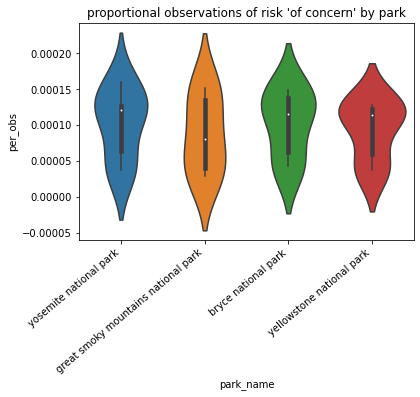

In [130]:
risk2 = biodiv6[biodiv6['conservation_status2']==2]
sns.violinplot(data=risk2, x='park_name', y='per_obs')
plt.xticks(rotation=40, ha='right')
plt.title('proportional observations of risk \'of concern\' by park')
plt.show()

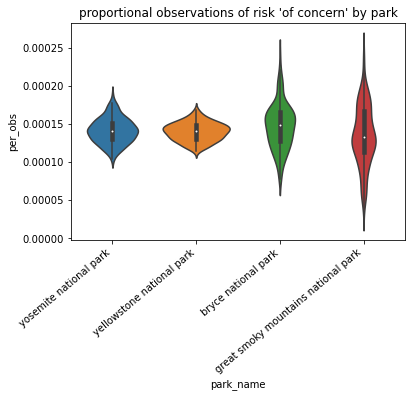

In [128]:
risk3 = biodiv6[biodiv6['conservation_status2']==3]
sns.violinplot(data=risk3, x='park_name', y='per_obs')
plt.xticks(rotation=40, ha='right')
plt.title('proportional observations of risk \'of concern\' by park')
plt.show()

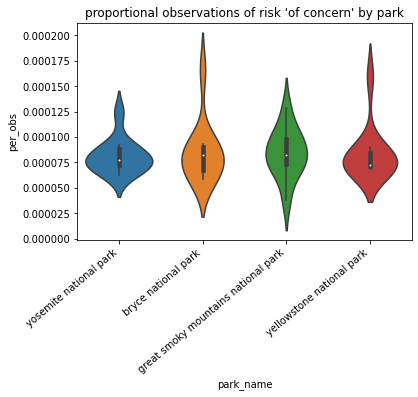

In [131]:
risk4 = biodiv6[biodiv6['conservation_status2']==4]
sns.violinplot(data=risk4, x='park_name', y='per_obs')
plt.xticks(rotation=40, ha='right')
plt.title('proportional observations of risk \'of concern\' by park')
plt.show()

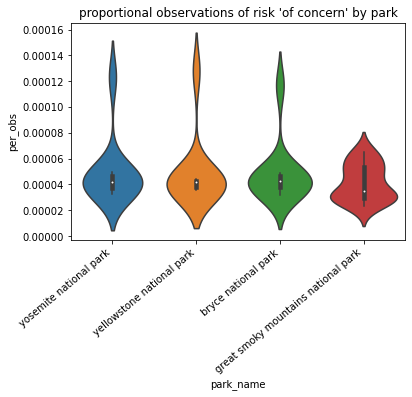

In [132]:
risk5 = biodiv6[biodiv6['conservation_status2']==5]
sns.violinplot(data=risk5, x='park_name', y='per_obs')
plt.xticks(rotation=40, ha='right')
plt.title('proportional observations of risk \'of concern\' by park')
plt.show()